## Working with Tilecode in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/15_tilecode.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/15_tilecode.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/15_tilecode.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/15_tilecode.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2tilecode

In [1]:
from vgrid.conversion.latlon2dggs import latlon2tilecode

lat = 10.775276
lon = 106.706797
res = 14
tilecode_id = latlon2tilecode(lat, lon, res)
tilecode_id

'z14x13048y7698'

### Tilecode to Polygon

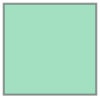

In [2]:
from vgrid.conversion.dggs2geo.tilecode2geo import tilecode2geo

tilecode_geo = tilecode2geo(tilecode_id)
tilecode_geo

### Tilecode to GeoJSON        

In [ ]:
from vgrid.conversion.dggs2geo.tilecode2geo import tilecode2geojson

tilecode_geojson = tilecode2geojson(tilecode_id)
# tilecode_geojson

### Vector to Tilecode

Processing features: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


<Axes: >

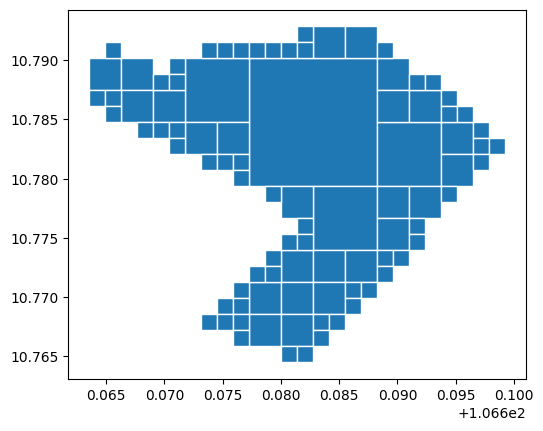

In [1]:
from vgrid.conversion.vector2dggs.vector2tilecode import vector2tilecode

file_path = "https://raw.githubusercontent.com/opengeoshub/vopendata/main/shape/polygon2.geojson"
vector_to_tilecode = vector2tilecode(
    file_path,
    compact=True,
    resolution=18,
    topology=True,
    predicate="intersects",
    output_format="gpd",
)
# Visualize the output

vector_to_tilecode.plot(edgecolor="white")

### Tilecode Compact

<Axes: >

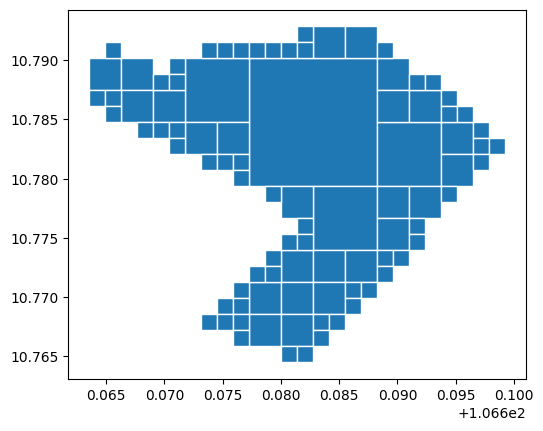

In [2]:
from vgrid.conversion.dggscompact.tilecodecompact import tilecodecompact

tilecode_compacted = tilecodecompact(
    vector_to_tilecode, tilecode_id="tilecode", output_format="gpd"
)
tilecode_compacted.plot(edgecolor="white")

### Tilecode Expand

<Axes: >

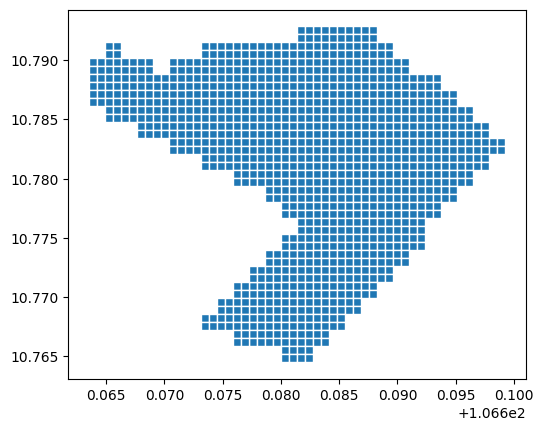

In [3]:
from vgrid.conversion.dggscompact.tilecodecompact import tilecodeexpand

tilecode_expanded = tilecodeexpand(
    vector_to_tilecode, resolution=19, output_format="gpd"
)
tilecode_expanded.plot(edgecolor="white")

### Tilecode Binning

Generating Tilecode DGGS: 768 cells [00:00, 10872.45 cells/s]


<Axes: >

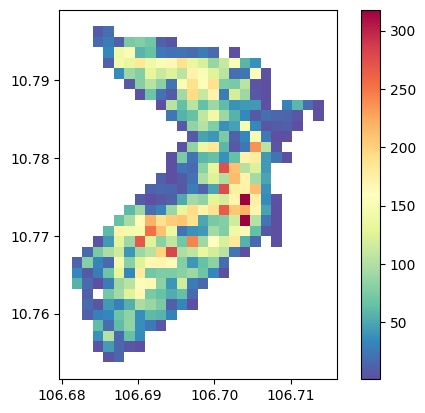

In [7]:
from vgrid.binning.tilecodebin import tilecodebin

file_path = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/csv/dist1_pois.csv"
)
stats = "count"
tilecode_bin = tilecodebin(
    file_path,
    resolution=18,
    stats=stats,
    # numeric_field="confidence",
    # category="category",
    output_format="gpd",
)
tilecode_bin.plot(
    column=stats,  # numeric column to base the colors on
    cmap="Spectral_r",  # color scheme (matplotlib colormap)
    legend=True,
    linewidth=0.2,  # boundary width (optional)
)

### Raster to Tilecode

#### Download and open raster

WARNING [rasterio._env:368  open()] CPLE_AppDefined in PROJ: proj_create_from_database: Cannot find proj.db


rgb.tif already exists. Skip downloading. Set overwrite=True to overwrite.
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 240, 'height': 147, 'count': 3, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(2.6640125000199077e-06, 0.0, 106.708118755,
       0.0, -2.6640136054383103e-06, 10.812568272)}


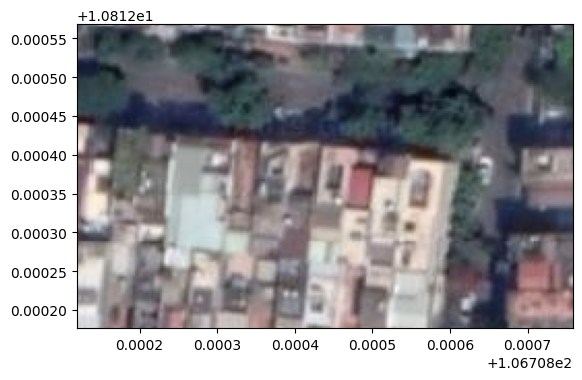

<Axes: >

In [8]:
from vgrid.utils.io import download_file
import rasterio
from rasterio.plot import show

raster_url = (
    "https://raw.githubusercontent.com/opengeoshub/vopendata/main/raster/rgb.tif"
)
raster_file = download_file(raster_url)
src = rasterio.open(raster_file, "r")
print(src.meta)
show(src)

#### Convert raster to Tilecode

In [10]:
# %pip install folium

In [9]:
from vgrid.conversion.raster2dggs.raster2tilecode import raster2tilecode

raster_to_tilecode = raster2tilecode(raster_file, output_format="gpd")

# Visualize the output
import folium

m = folium.Map(tiles="CartoDB positron", max_zoom=28)

tilecode_layer = folium.GeoJson(
    raster_to_tilecode,
    style_function=lambda x: {
        "fillColor": f"rgb({x['properties']['band_1']}, {x['properties']['band_2']}, {x['properties']['band_3']})",
        "fillOpacity": 1,
        "color": "black",
        "weight": 1,
    },
    popup=folium.GeoJsonPopup(
        fields=["tilecode", "band_1", "band_2", "band_3"],
        aliases=["Tilecode ID", "Band 1", "Band 2", "Band 3"],
        style="""
            background-color: white;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """,
    ),
).add_to(m)

m.fit_bounds(tilecode_layer.get_bounds())

# Display the map
m

Cell size: 0.08638527081938627 m2
Nearest Tilecode resolution determined: 26


Converting raster to Tilecode: 100%|██████████| 8925/8925 [00:00<00:00, 40673.83 cells/s]


### Tilecode Generator

Generating Tilecode DGGS: 195 cells [00:00, 9704.20 cells/s]


<Axes: >

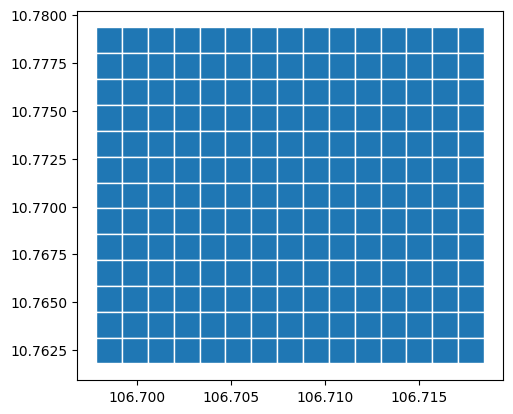

In [10]:
from vgrid.generator.tilecodegrid import tilecodegrid

# tilecode_grid = tilecodegrid(resolution=2,output_format="gpd")
tilecode_grid = tilecodegrid(
    resolution=18,
    bbox=[106.699007, 10.762811, 106.717674, 10.778649],
    output_format="gpd",
)
tilecode_grid.plot(edgecolor="white")

### Tilecode Inspect

In [1]:
from vgrid.stats.tilecodestats import tilecodeinspect

resolution = 7
tilecode_inspect = tilecodeinspect(resolution)
tilecode_inspect.head()

Generating Tilecode DGGS: 16384 cells [00:01, 14494.30 cells/s]


tilecode  resolution  center_lat  center_lon    cell_width   cell_height  \
0   z7x0y0           7   84.926801  -178.59375  28454.129379  27771.076917   
1   z7x0y1           7   84.671917  -178.59375  29879.298302  29162.168544   
2   z7x0y2           7   84.404267  -178.59375  31375.155502  30622.279581   
3   z7x0y3           7   84.123216  -178.59375  32945.097361  32154.729646   
4   z7x0y4           7   83.828101  -178.59375  34592.666003  33762.981365   

      cell_area  cell_perimeter  \
0  7.711209e+08   111092.677554   
1  8.503136e+08   116657.764770   
2  9.375993e+08   122499.012966   
3  1.033796e+09   128629.712154   
4  1.139804e+09   135063.726094   

                                            geometry  crossed  norm_area  \
0  POLYGON ((-180 84.80247, -177.1875 84.80247, -...    False   0.024863   
1  POLYGON ((-180 84.54136, -177.1875 84.54136, -...    False   0.027416   
2  POLYGON ((-180 84.26717, -177.1875 84.26717, -...    False   0.030231   
3  POLYGON ((-180 83.97926, -177.1875 83.97926, -...    False   0.033332   
4  POLYGON ((-180 83.67694, -177.1875 83.67694, -...    False   0.036750   

        ipq       zsc  cvh  
0  0.785166  0.886095  1.0  
1  0.785166  0.886095  1.0  
2  0.785167  0.886096  1.0  
3  0.785167  0.886096  1.0  
4  0.785168  0.886096  1.0

### Tilecode Normalized Area Histogram

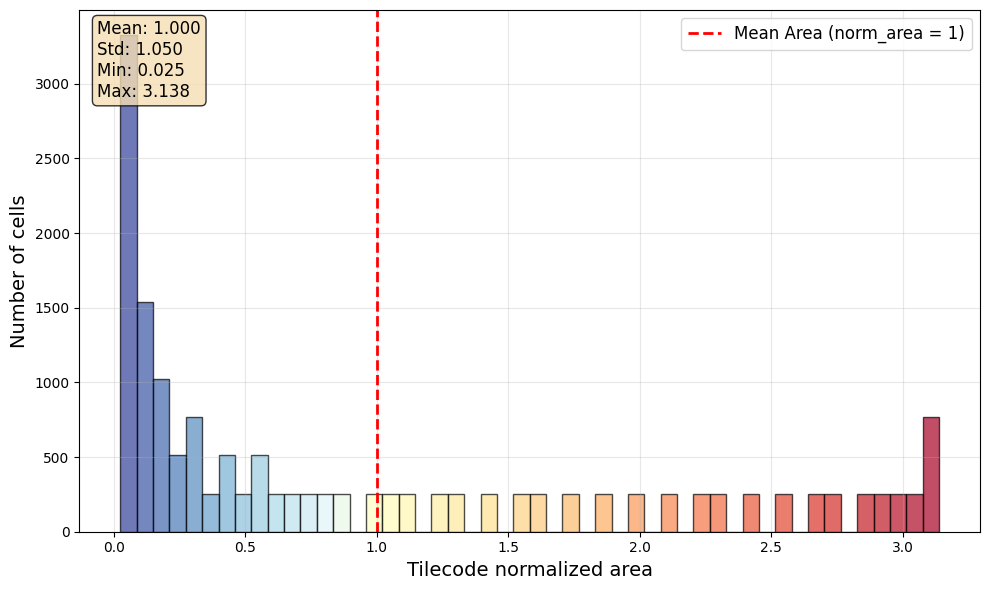

In [2]:
from vgrid.stats.tilecodestats import tilecode_norm_area_hist

tilecode_norm_area_hist(tilecode_inspect)

### Distribution of Tilecode Area Distortions

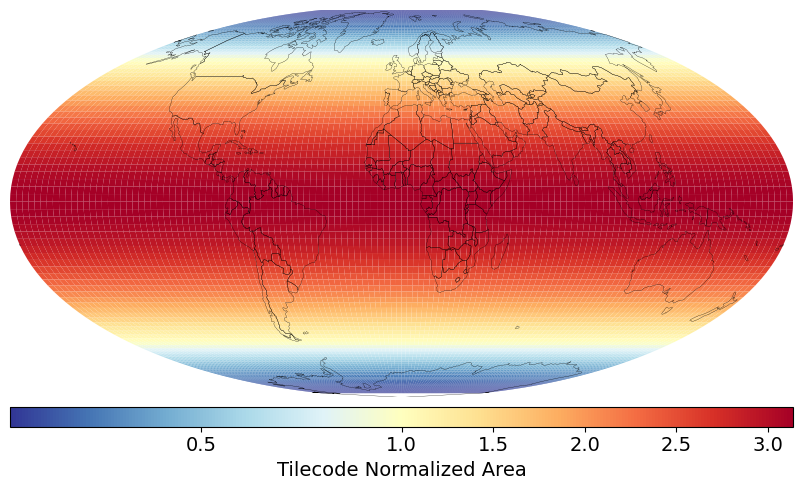

In [3]:
from vgrid.stats.tilecodestats import tilecode_norm_area

tilecode_norm_area(tilecode_inspect)

### Tilecode IPQ Compactness Histogram

Isoperimetric Inequality (IPQ) Compactness (suggested by [Osserman, 1978](https://sites.math.washington.edu/~toro/Courses/20-21/MSF/osserman.pdf)):

$$C_{IPQ} = \frac{4 \pi A}{p^2}$$
The range of the IPQ compactness metric is [0,1]. 

A circle represents the maximum compactness with a value of 1. 

As shapes become more irregular or elongated, their compactness decreases toward 0.

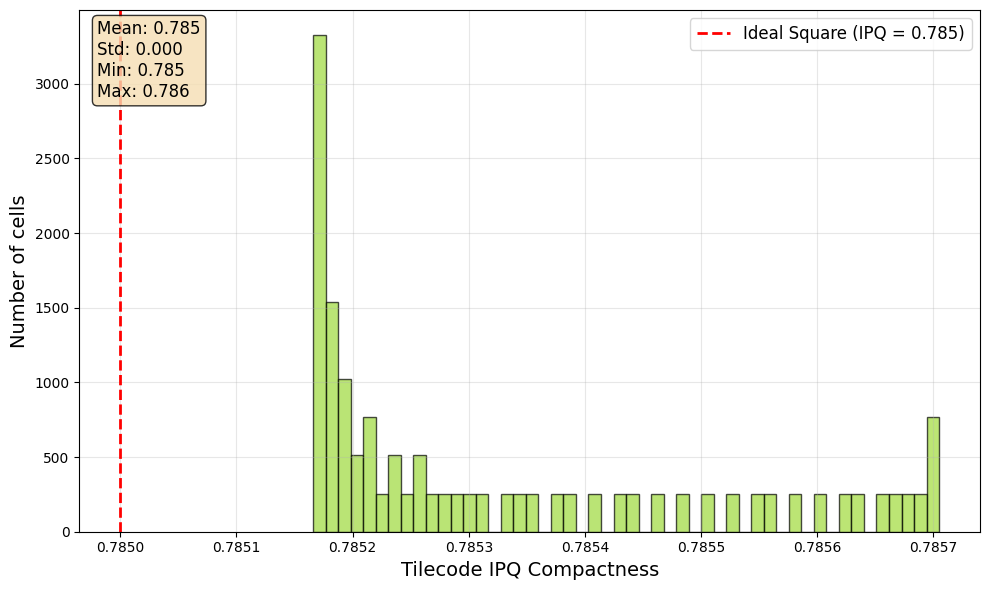

In [4]:
from vgrid.stats.tilecodestats import tilecode_compactness_ipq_hist

tilecode_compactness_ipq_hist(tilecode_inspect)

### Distribution of Tilecode IPQ Compactness

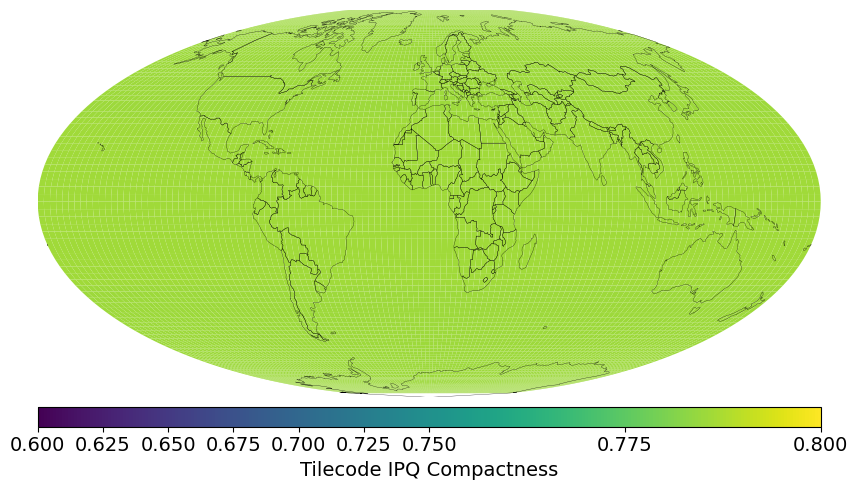

In [5]:
from vgrid.stats.tilecodestats import tilecode_compactness_ipq

tilecode_compactness_ipq(tilecode_inspect)

### Tilecode Convex hull Compactness Histogram:

$$C_{CVH} = \frac{A}{A_{CVH}}$$


The range of the convex hull compactness metric is [0,1]. 

As shapes become more concave, their convex hull compactness decreases toward 0.

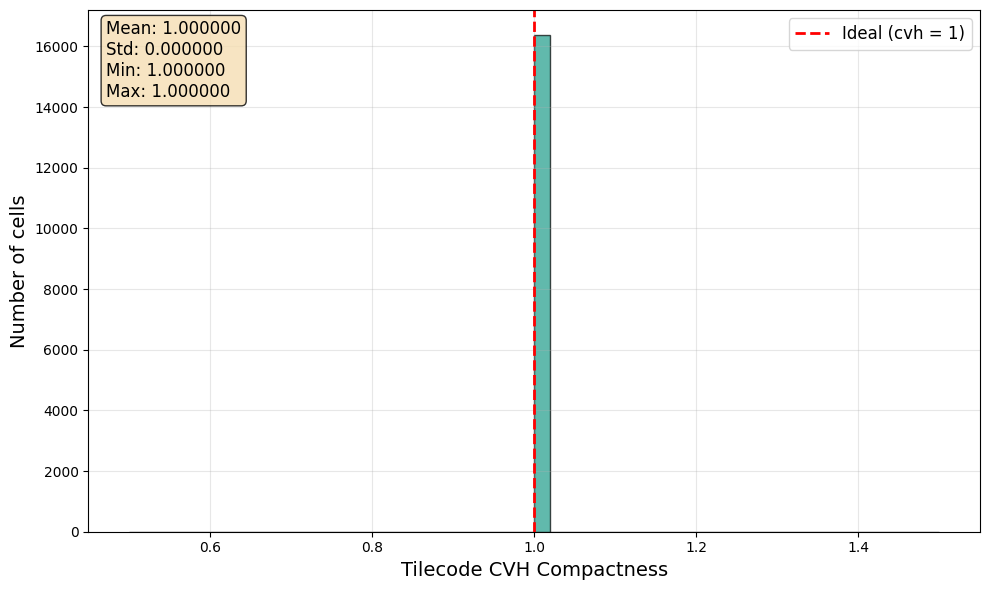

In [6]:
from vgrid.stats.tilecodestats import tilecode_compactness_cvh_hist

tilecode_compactness_cvh_hist(tilecode_inspect)

### Distribution of Tilecode Convex hull Compactness

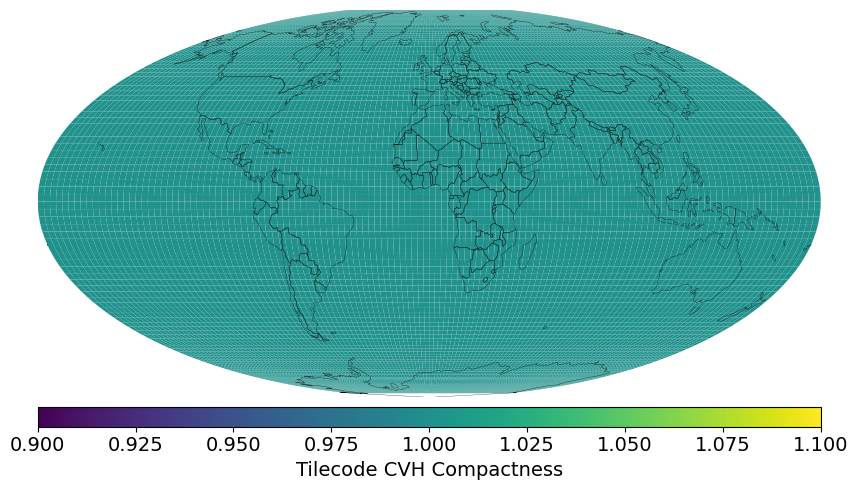

In [7]:
from vgrid.stats.tilecodestats import tilecode_compactness_cvh

tilecode_compactness_cvh(tilecode_inspect)

### Tilecode Statistics

Characteristic Length Scale (CLS - suggested by Ralph Kahn): the diameter of a spherical cap of the same cell's area

In [2]:
from vgrid.stats import tilecodestats

tilecodestats("km")

resolution     number_of_cells  avg_edge_len_km  avg_cell_area_km2  \
0            0                   1     22584.632424       5.100656e+08   
1            1                   4     11292.316212       1.275164e+08   
2            2                  16      5646.158106       3.187910e+07   
3            3                  64      2823.079053       7.969775e+06   
4            4                 256      1411.539526       1.992444e+06   
5            5                1024       705.769763       4.981110e+05   
6            6                4096       352.884882       1.245277e+05   
7            7               16384       176.442441       3.113193e+04   
8            8               65536        88.221220       7.782984e+03   
9            9              262144        44.110610       1.945746e+03   
10          10             1048576        22.055305       4.864365e+02   
11          11             4194304        11.027653       1.216091e+02   
12          12            16777216         5.513826       3.040228e+01   
13          13            67108864         2.756913       7.600570e+00   
14          14           268435456         1.378457       1.900143e+00   
15          15          1073741824         0.689228       4.750356e-01   
16          16          4294967296         0.344614       1.187589e-01   
17          17         17179869184         0.172307       2.968973e-02   
18          18         68719476736         0.086154       7.422432e-03   
19          19        274877906944         0.043077       1.855608e-03   
20          20       1099511627776         0.021538       4.639020e-04   
21          21       4398046511104         0.010769       1.159755e-04   
22          22      17592186044416         0.005385       2.899387e-05   
23          23      70368744177664         0.002692       7.248468e-06   
24          24     281474976710656         0.001346       1.812117e-06   
25          25    1125899906842624         0.000673       4.530293e-07   
26          26    4503599627370496         0.000337       1.132573e-07   
27          27   18014398509481984         0.000168       2.831433e-08   
28          28   72057594037927936         0.000084       7.078582e-09   
29          29  288230376151711744         0.000042       1.769646e-09   

          cls_km  
0   40030.218711  
1   13343.406237  
2    6439.310880  
3    3193.858049  
4    1593.790570  
5     796.505573  
6     398.204153  
7     199.096000  
8      99.547240  
9      49.773525  
10     24.886751  
11     12.443374  
12      6.221687  
13      3.110843  
14      1.555422  
15      0.777711  
16      0.388855  
17      0.194428  
18      0.097214  
19      0.048607  
20      0.024303  
21      0.012152  
22      0.006076  
23      0.003038  
24      0.001519  
25      0.000759  
26      0.000380  
27      0.000190  
28      0.000095  
29      0.000047